#### Benjamin Henningsen - bhd505

# Model Project

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from scipy.optimize import minimize_scalar
from scipy.optimize import root_scalar

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## 1 Labor Supply

### 1.1 Numerical optimizer vs root-finder

In [21]:
# 1:  We use the worker class provided in the file worker.py
from Worker import WorkerClass

In [29]:
# The worker class is defined as worker and productivity is set to 1
worker = WorkerClass()
par = worker.par
sol = worker.sol

worker.par.ps = np.array([1.0])

p = 1.0

# The worker file is incomplete, and therefore the correct functions are written.

In [27]:
# We can then plot the utility with labor supply between 0.5 and ell_max
ell_values = np.linspace(0.5, worker.par.ell_max, 1000)
utility_values = []

In [24]:
# The utility is calculated for each labor supply value
for ell in ell_values:
    try:
        u = worker.value_of_choice(p, ell)
        utility_values.append(u)
    except:
        utility_values.append(np.nan)

In [28]:
opt_numerical = worker.optimal_choice(p)
opt_foc = worker.optimal_choice_FOC(p)

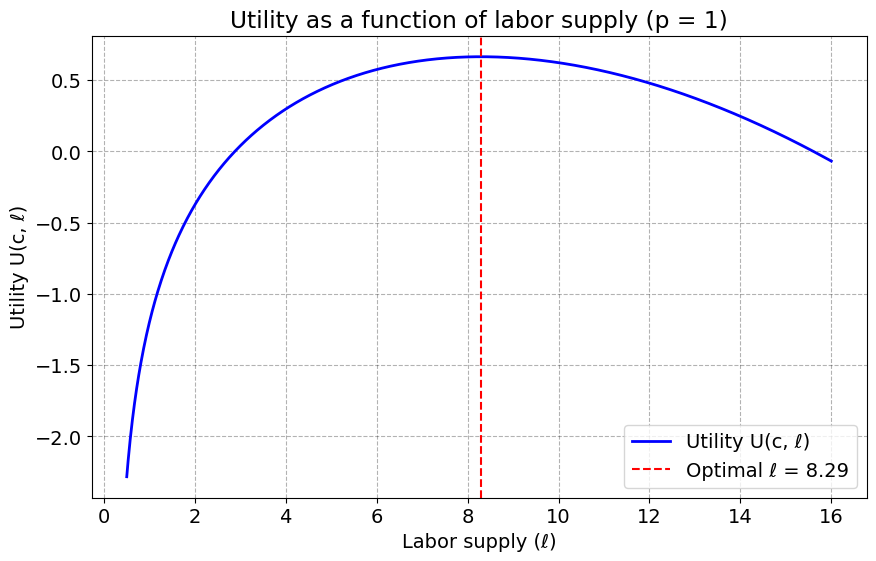

In [140]:
# THe figure is plotted
plt.figure(figsize=(10, 6))
plt.plot(ell_values, utility_values, 'b-', linewidth=2, label='Utility U(c, ℓ)')
plt.axvline(opt_numerical.ell, color='red', linestyle='--', 
           label=f'Optimal ℓ = {opt_numerical.ell:.2f}')
plt.xlabel('Labor supply (ℓ)')
plt.ylabel('Utility U(c, ℓ)')
plt.title('Utility as a function of labor supply (p = 1)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [141]:
# 2:  We can then plot the FOC for the labor supply in the same range
phi_values = []

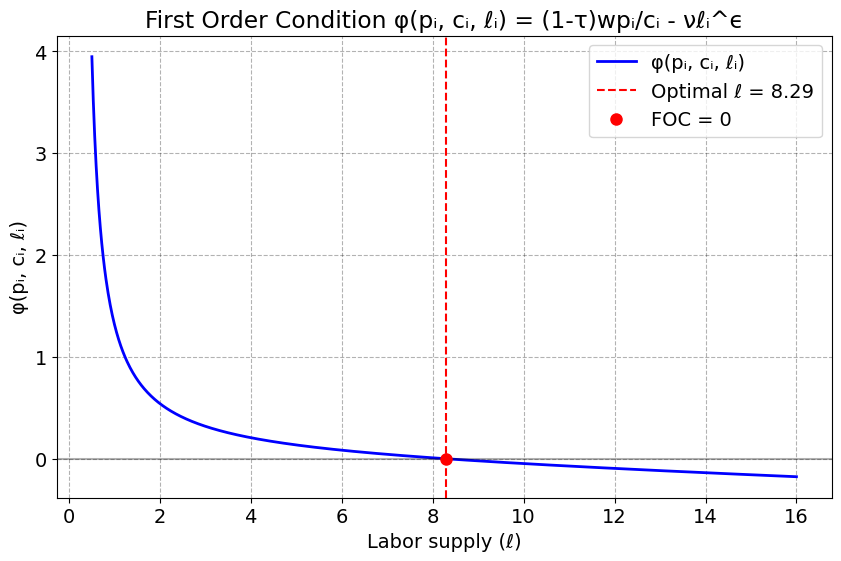

In [ ]:
# We calculate FOC for each labor supply value
for ell in ell_values:
    phi = worker.FOC(p, ell)
    phi_values.append(phi)

# We determine optimal choice 
opt = worker.optimal_choice(p)
phi_at_opt = worker.FOC(p, opt.ell)

# Plot FOC function
plt.figure(figsize=(10, 6))
plt.plot(ell_values, phi_values, 'b-', linewidth=2, label='φ(pᵢ, cᵢ, ℓᵢ)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.axvline(x=opt.ell, color='red', linestyle='--', 
           label=f'Optimal ℓ = {opt.ell:.2f}')
plt.plot(opt.ell, 0, 'ro', markersize=8, label='FOC = 0')

plt.xlabel('Labor supply (ℓ)')
plt.ylabel('φ(pᵢ, cᵢ, ℓᵢ)')
plt.title('First Order Condition φ(pᵢ, cᵢ, ℓᵢ) = (1-τ)wpᵢ/cᵢ - νℓᵢ^ϵ')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [151]:
# 3:  We can find the optimal labor supply using a numerical optimizer to solve eq 4
# this can be done by defining the function in the worker class file and then get:
opt_num = worker.optimal_choice_numerical(p)

In [146]:
# 4: The same can be done for eq 5 using a root-finder where we get:
opt_root = worker.optimal_choice_root(p)

In [ ]:
# 5: We can then compare the results

# We create data for plotting
ell_values = np.linspace(worker.get_min_ell(p), worker.par.ell_max, 200)
utility_values = [worker.value_of_choice(p, ell) for ell in ell_values]
foc_values = [worker.FOC(p, ell) for ell in ell_values]

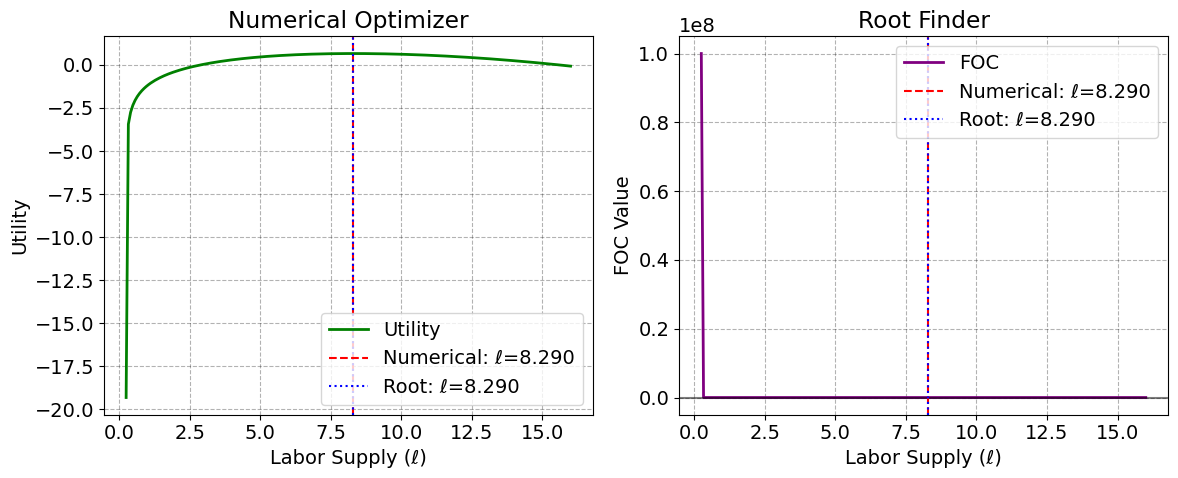

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Utility comparison
ax1.plot(ell_values, utility_values, 'green', linewidth=2, label='Utility')
ax1.axvline(opt_numerical.ell, color='red', linestyle='--', label=f'Numerical: ℓ={opt_numerical.ell:.3f}')
ax1.axvline(opt_root.ell, color='blue', linestyle=':', label=f'Root: ℓ={opt_root.ell:.3f}')
ax1.set_xlabel('Labor Supply (ℓ)')
ax1.set_ylabel('Utility')
ax1.set_title('Numerical Optimizer')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: FOC comparison
ax2.plot(ell_values, foc_values, 'purple', linewidth=2, label='FOC')
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax2.axvline(opt_numerical.ell, color='red', linestyle='--', label=f'Numerical: ℓ={opt_numerical.ell:.3f}')
ax2.axvline(opt_root.ell, color='blue', linestyle=':', label=f'Root: ℓ={opt_root.ell:.3f}')
ax2.set_xlabel('Labor Supply (ℓ)')
ax2.set_ylabel('FOC Value')
ax2.set_title('Root Finder')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




In [ ]:
# 5: We can here see, that the methods are equally fast and give identical results.

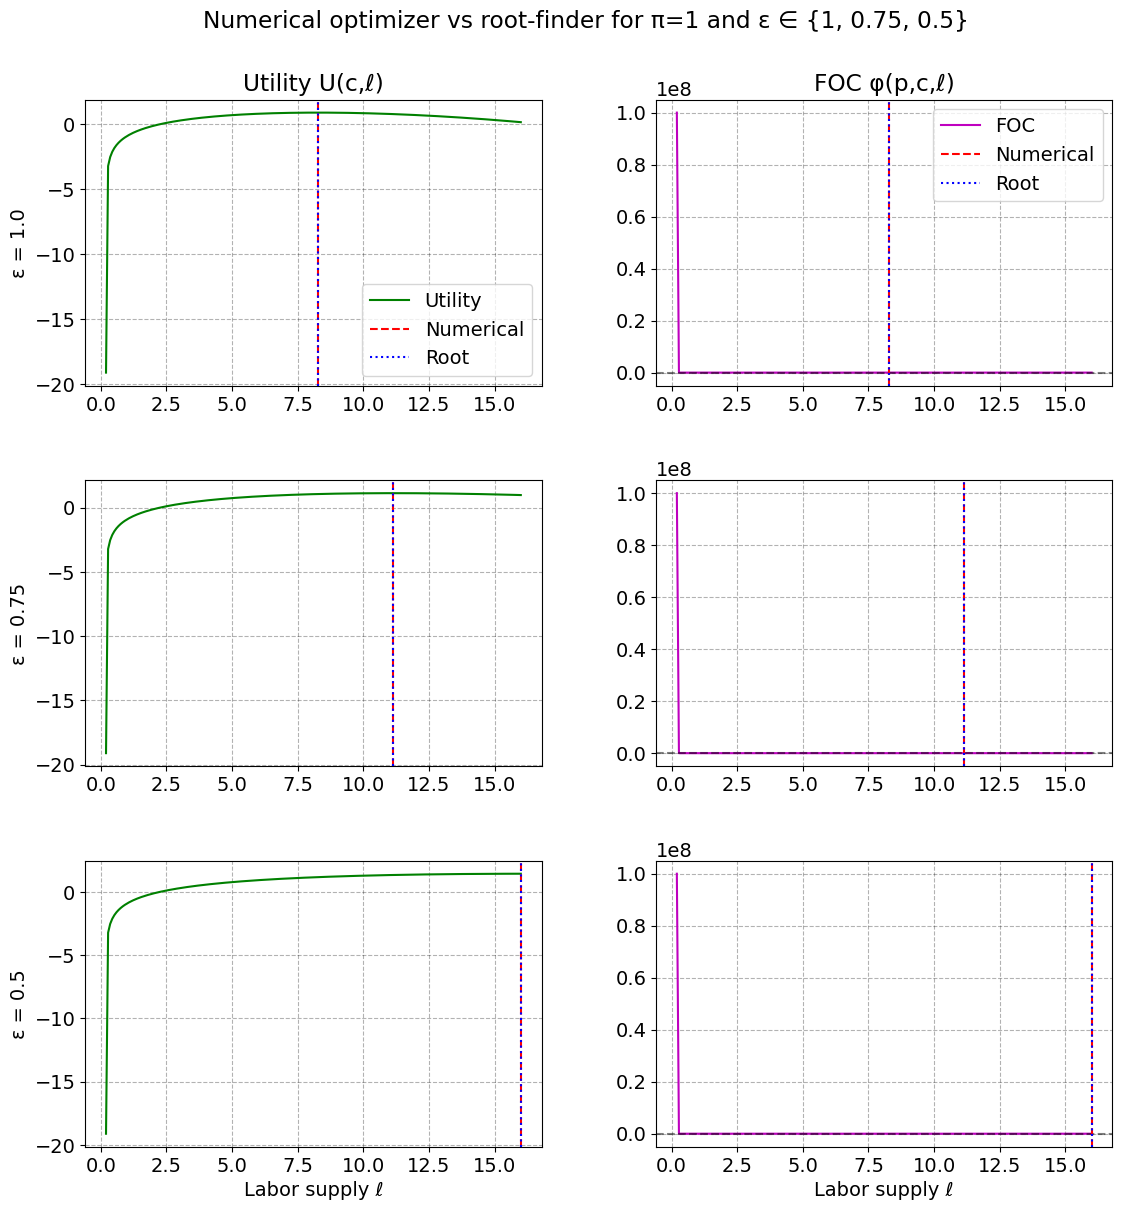

In [ ]:
# 6: We then need to combine all this into one single figure, and then again with new parameters.

def compute_for_epsilon(eps):
    worker = WorkerClass()
    par = worker.par
    par.epsilon = eps           
    p = 1.0        

    # grid for ell
    ell_vals = np.linspace(worker.get_min_ell(p), par.ell_max, 200)

    # utility and FOC on the grid
    U_vals   = [worker.value_of_choice(p, ell) for ell in ell_vals]
    FOC_vals = [worker.FOC(p, ell)            for ell in ell_vals]


    return ell_vals, U_vals, FOC_vals, opt_num, opt_root

eps_list = [1.0, 0.75, 0.5]

fig, axes = plt.subplots(len(eps_list), 2, figsize=(12, 4*len(eps_list)))
fig.tight_layout(pad=3.0)

for r, eps in enumerate(eps_list):
    ell_vals, U_vals, FOC_vals, opt_num, opt_root = compute_for_epsilon(eps)

    # Utility and FOC on the grid
    axU = axes[r, 0]
    axU.plot(ell_vals, U_vals, 'g-', label='Utility')
    axU.axvline(opt_num.ell,  color='red',  linestyle='--', label='Numerical')
    axU.axvline(opt_root.ell, color='blue', linestyle=':',  label='Root')
    axU.set_ylabel(f'ε = {eps}')
    axU.grid(True, alpha=0.3)
    if r == len(eps_list)-1:
        axU.set_xlabel('Labor supply ℓ')
    if r == 0:
        axU.set_title('Utility U(c,ℓ)')
        axU.legend()

    axF = axes[r, 1]
    axF.plot(ell_vals, FOC_vals, 'm-', label='FOC')
    axF.axhline(0, color='black', linestyle='--', alpha=0.5)
    axF.axvline(opt_num.ell,  color='red',  linestyle='--', label='Numerical')
    axF.axvline(opt_root.ell, color='blue', linestyle=':',  label='Root')
    axF.grid(True, alpha=0.3)
    if r == len(eps_list)-1:
        axF.set_xlabel('Labor supply ℓ')
    if r == 0:
        axF.set_title('FOC φ(p,c,ℓ)')
        axF.legend()

plt.suptitle('Numerical optimizer vs root-finder for π=1 and ε ∈ {1, 0.75, 0.5}', y=1.02)
plt.show()

In [ ]:
# We have different figures where the rows indicate different values of epsilon. 
# And the columns indicate utility and FOC respectively.

### 1.2 Labor supply function

In [ ]:
# 1: We want to find the optimal labor supply for different productivities
# We can use the original worker class where productivity is set to an array of values

ps = np.linspace(0.5, 3.0, 100)
ell_star = np.zeros_like(ps)
for i, p in enumerate(ps): # we enumerate over productivities
    opt = worker.optimal_choice(p)
    ell_star[i] = opt.ell

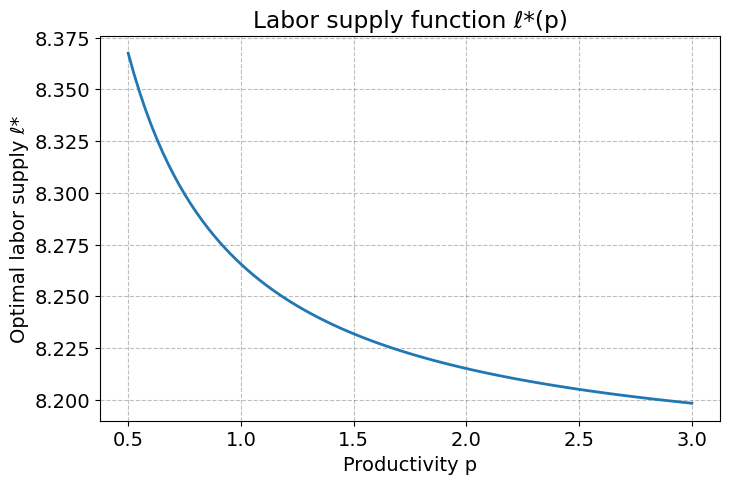

In [8]:
# The function is then plotted
plt.figure(figsize=(8,5))
plt.plot(ps, ell_star, linewidth=2)
plt.xlabel("Productivity p")
plt.ylabel("Optimal labor supply ℓ*")
plt.title("Labor supply function ℓ*(p)")
plt.grid(True)
plt.show()

In [ ]:
# 2: This exercise is equivalent to the previous one, but we now have that zeta = -0.1
worker = WorkerClass(par={'zeta': -0.1})

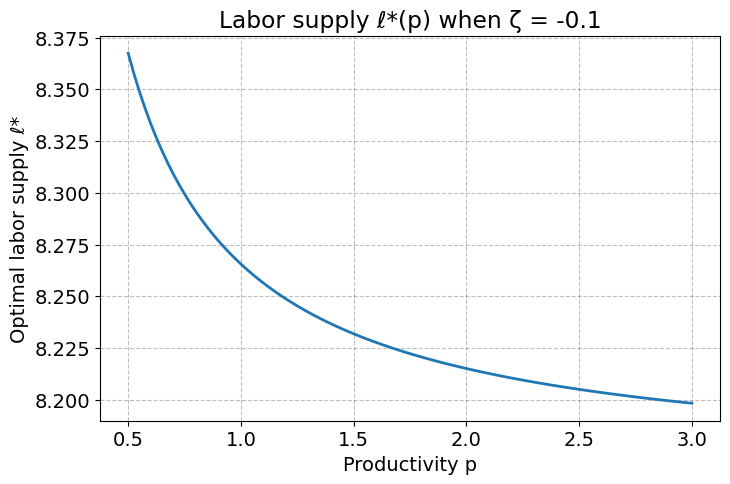

In [12]:
# We can plot the new labor supply function
plt.figure(figsize=(8,5))
plt.plot(ps, ell_star, linewidth=2)
plt.xlabel("Productivity p")
plt.ylabel("Optimal labor supply ℓ*")
plt.title("Labor supply ℓ*(p) when ζ = -0.1")
plt.grid(True)
plt.show()

## 2 Public good

### 2.1 Tax Revenue and Social Welfare Function

In [15]:
# 1:  We want to compute the total tax revenue and social welfare function with the given values
# This requires the GovermentClass which is imported
from Government import GovernmentClass
gov = GovernmentClass()

In [ ]:
# In the Goverment file we must edit the parameters as in the description so chi = 1/2N instead of 50
# The missing functions are also implemented in the Government file

In [18]:
# We can then compute the total tax revenue with our given parameters:
gov.par.tau  = 0.50
gov.par.zeta = 0.10

# We first draw the productivities for each worker
gov.draw_productivities()

In [ ]:
# We then solve for each worker's optimal labor supply
gov.solve_workers()

In [25]:
# We then define Total tax function and SWF and print the result
T   = gov.tax_revenue()
SWF = gov.SWF()

print(T, SWF)

425.86815939949565 176.14848205817322


In [ ]:
# Total tax revenue is therefore 425.87 and SWF is 176.15

In [28]:
# 2: We want to plot the two functions for the given intervals in tau and zeta:
taus  = np.linspace(0.01, 0.80, 100)
zetas = [-0.1, 0.0, 0.1]

# We then store results
T_results   = {z: np.empty_like(taus) for z in zetas}
SWF_results = {z: np.empty_like(taus) for z in zetas}

In [29]:
# We can then loop over the parameter values:
for z in zetas:
    gov.par.zeta = z

    for j, tau in enumerate(taus):
        gov.par.tau = tau

        # solve workers for this (tau, zeta)
        gov.solve_workers()

        # compute tax revenue and SWF
        T_results[z][j]   = gov.tax_revenue()
        SWF_results[z][j] = gov.SWF()

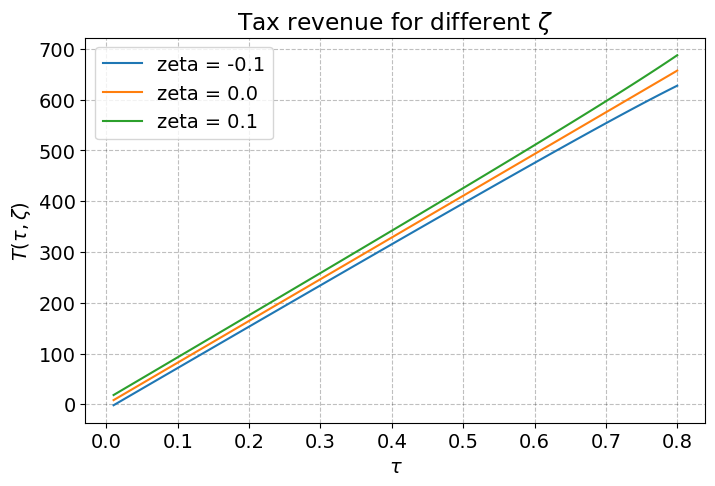

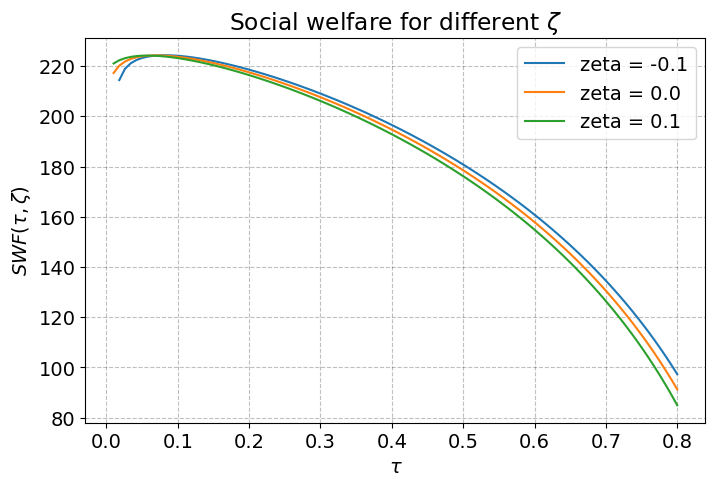

In [30]:
# And finally we can plot the results

# Plot tax revenue
plt.figure(figsize=(8,5))
for z in zetas:
    plt.plot(taus, T_results[z], label=f"zeta = {z}")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$T(\tau,\zeta)$")
plt.title("Tax revenue for different $\zeta$")
plt.legend()
plt.grid(True)
plt.show()

# Plot SWF
plt.figure(figsize=(8,5))
for z in zetas:
    plt.plot(taus, SWF_results[z], label=f"zeta = {z}")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$SWF(\tau,\zeta)$")
plt.title("Social welfare for different $\zeta$")
plt.legend()
plt.grid(True)
plt.show()

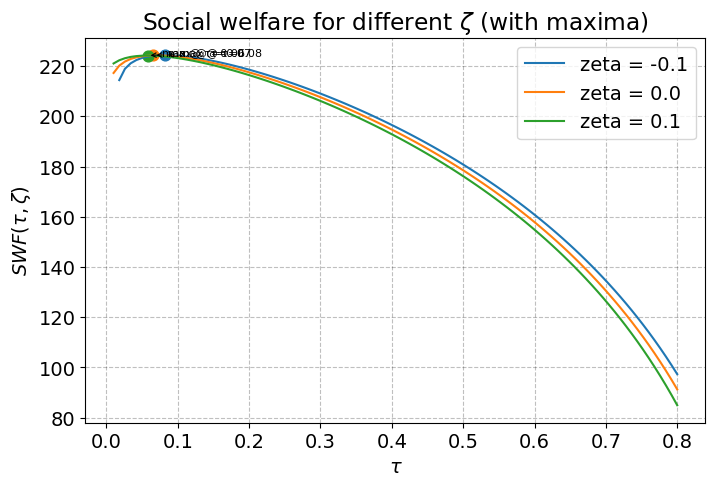

In [ ]:
#3: For this exercise we want to indicate the maximum of the SWF function

# We can plot the figure again and mark the maximum of each function

plt.figure(figsize=(8,5))

for z in zetas:
    SWF_z = SWF_results[z]

    plt.plot(taus, SWF_z, label=f"zeta = {z}")

    idx_max = np.nanargmax(SWF_z)
    tau_star = taus[idx_max]
    swf_star = SWF_z[idx_max]

    # mark the maximum point
    plt.scatter(tau_star, swf_star, s=60)x
    plt.annotate(
        f"max @ τ={tau_star:.2f}",
        xy=(tau_star, swf_star),
        xytext=(tau_star + 0.02, swf_star),
        arrowprops=dict(arrowstyle="->", lw=0.8),
        fontsize=8
    )

plt.xlabel(r"$\tau$")
plt.ylabel(r"$SWF(\tau,\zeta)$")
plt.title("Social welfare for different $\zeta$ (with maxima)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# We see that the maxima are right at the beginning, at about tau = 0.7 but at slightly different points dependant on value of zeta.

### 2.2 Optimal tax system

In [ ]:
from scipy.optimize import minimize

# 1: To optimize the function numerically we use the optimal_taxes function in the Government class
# Here we must insert the missing functions and defintions:

tau0, zeta0 = 0.5, 0.1 # We set parameter values
tau_star, zeta_star, SWF_star = gov.optimal_taxes(tau0, zeta0) # And optimize

print("tau*  =", tau_star)
print("zeta* =", zeta_star)
print("SWF*  =", SWF_star)

tau*  = 0.14309415795396913
zeta* = -0.5808514283363834
SWF*  = 224.4608959485166


In [ ]:
# 2: We verify that starting values do not matter for the solution found by trying different starting values

start_values = [
    (0.1, -0.5),
    (0.2,  0.0),
    (0.5,  0.1),
    (0.8,  0.5),
    (0.9, -0.2),
]

results = []

for (tau0, zeta0) in start_values:
    tau_star, zeta_star, SWF_star = gov.optimal_taxes(tau0, zeta0)
    results.append((tau_star, zeta_star, SWF_star))
    print(f"Start (tau0={tau0:.2f}, zeta0={zeta0:.2f}) "
          f"-> tau*={tau_star:.4f}, zeta*={zeta_star:.4f}, SWF*={SWF_star:.4f}")

Start (tau0=0.10, zeta0=-0.50) -> tau*=0.1432, zeta*=-0.5821, SWF*=224.4609
Start (tau0=0.20, zeta0=0.00) -> tau*=0.1427, zeta*=-0.5780, SWF*=224.4609
Start (tau0=0.50, zeta0=0.10) -> tau*=0.1431, zeta*=-0.5809, SWF*=224.4609
Start (tau0=0.80, zeta0=0.50) -> tau*=0.1432, zeta*=-0.5815, SWF*=224.4609
Start (tau0=0.90, zeta0=-0.20) -> tau*=0.1432, zeta*=-0.5819, SWF*=224.4609


In [ ]:
# We see that the values are equal for the parameters based on the different starting points.

In [39]:
# 3: We can now build a grid close to the optimum and plot the SWF total tax revenue close to this.

# We create values close to optimum
tau_min = max(0.0,  tau_star - 0.1)
tau_max = min(0.99, tau_star + 0.1)
zeta_min = zeta_star - 0.1
zeta_max = zeta_star + 0.1

tau_grid  = np.linspace(tau_min, tau_max, 50)
zeta_grid = np.linspace(zeta_min, zeta_max, 50)

T_vals   = np.empty((len(zeta_grid), len(tau_grid)))
SWF_vals = np.empty((len(zeta_grid), len(tau_grid)))

p_min = np.min(gov.sol.p)

In [ ]:
# We can then evaluate the functions on the grid
for i, z in enumerate(zeta_grid):
    for j, t in enumerate(tau_grid):

        # Put in restriction
        zeta_max_feasible = (1.0 - t)*gov.par.w*p_min*gov.par.ell_max
        if z >= zeta_max_feasible:
            T_vals[i,j]   = np.nan
            SWF_vals[i,j] = np.nan
            continue

        gov.par.tau  = t
        gov.par.zeta = z

        gov.solve_workers()
        T_vals[i,j]   = gov.tax_revenue()
        SWF_vals[i,j] = gov.SWF()

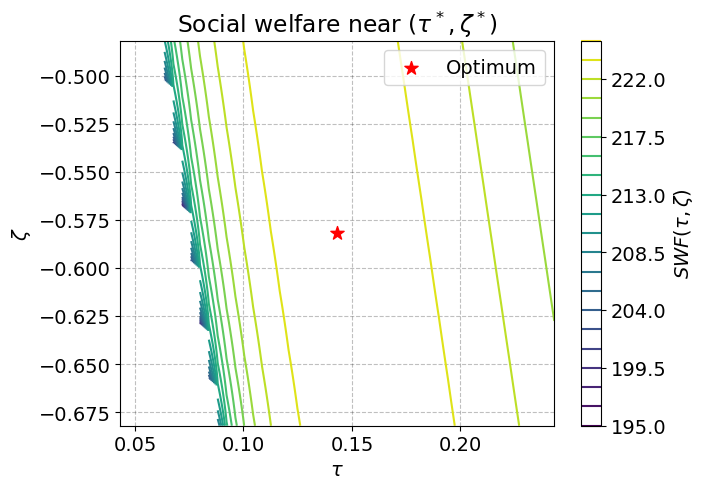

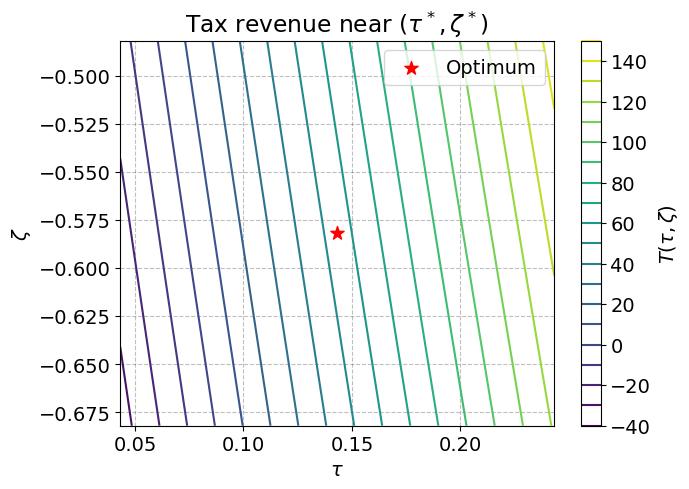

In [45]:
# Lastly the functions are plotted

plt.figure(figsize=(7,5))
cs = plt.contour(TAU, ZETA, SWF_vals, levels=20)
plt.colorbar(cs, label=r"$SWF(\tau,\zeta)$")
plt.scatter(tau_star, zeta_star, color="red", marker="*", s=100, label="Optimum")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\zeta$")
plt.title("Social welfare near $(\\tau^*, \\zeta^*)$")
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
cs = plt.contour(TAU, ZETA, T_vals, levels=20)
plt.colorbar(cs, label=r"$T(\tau,\zeta)$")
plt.scatter(tau_star, zeta_star, color="red", marker="*", s=100, label="Optimum")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\zeta$")
plt.title("Tax revenue near $(\\tau^*, \\zeta^*)$")
plt.legend()
plt.show()

In [ ]:
# 4: We want to plot the Lorenz curve of consumption with the optimal values

# We get consumption pr. worker and sort it
c = gov.sol.c 

c_sorted = np.sort(c)

# We then get cumulative population share 
n = len(c_sorted)
pop_share = np.arange(1, n+1) / n

# And compute the cumulative consumption share 
cum_consumption = np.cumsum(c_sorted) / np.sum(c_sorted)

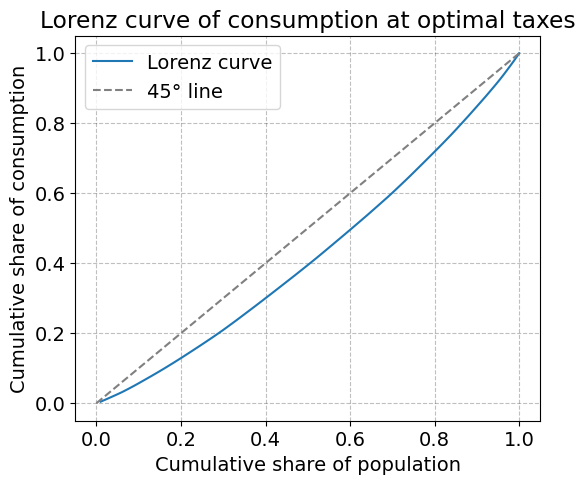

In [51]:
# Then we plot the figure
plt.figure(figsize=(6,5))
plt.plot(pop_share, cum_consumption, label="Lorenz curve")
plt.plot([0,1], [0,1], linestyle='--', color='gray', label="45° line")

plt.xlabel("Cumulative share of population")
plt.ylabel("Cumulative share of consumption")
plt.title("Lorenz curve of consumption at optimal taxes")
plt.legend()
plt.grid(True)
plt.show()

## 3 Top tax

### 3.1 Labor supply

In [ ]:
# 1: We want to plot the utility function from the Worker file, with the new c in the given interval.

# We define the optimal proportional- and lump-sum tax with new parameter values
gov.par.tau   = tau_star      
gov.par.zeta  = zeta_star   
gov.par.kappa = 9.0  
gov.par.omega = 0.2         

# We define the function for the post top tax income
def y_top(p, ell):
    par = gov.par
    income = par.w * p * ell 
    extra_base = max(income - par.kappa, 0.0)
    y = (1 - par.tau) * income - par.omega * extra_base - par.zeta
    return y


In [106]:
# We choose a worker
p_i = np.median(gov.sol.p)

# Specify the grid
ells = np.linspace(0.5, gov.par.ell_max, 200)

# compute consumption and utility with top tax
cons = np.array([y_top(p_i, ell) for ell in ells])
U    = gov.utility(cons, ells)

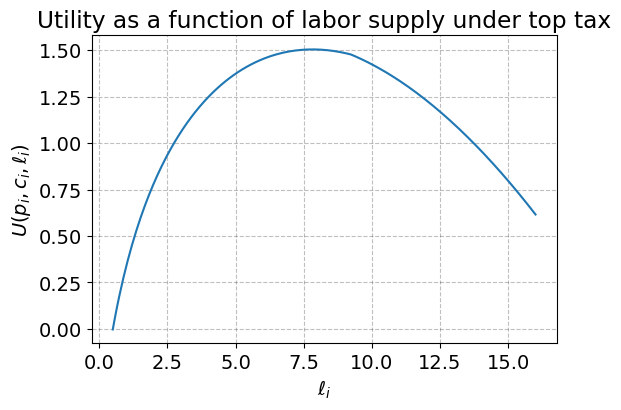

In [107]:
# We plot the utility
plt.figure(figsize=(6,4))
plt.plot(ells, U)
plt.xlabel(r"$\ell_i$")
plt.ylabel(r"$U(p_i, c_i, \ell_i)$")
plt.title("Utility as a function of labor supply under top tax")
plt.grid(True)
plt.show()

In [108]:
# 2: We want to plot the FOC in the given interval

par = gov.par # We specify parameters
ell_k = par.kappa / (par.w * p_i) # And the interval

# We get the grid
ells_low = np.linspace(0.5, ell_k, 200)

phi_low = []
for ell in ells_low:
    c = y_top(p_i, ell)
    phi_val = ((1 - par.tau) * par.w * p_i) / c - par.nu * (ell**par.epsilon)
    phi_low.append(phi_val)

phi_low = np.array(phi_low)

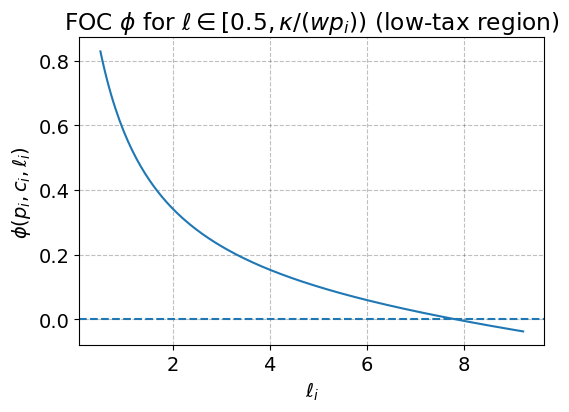

In [ ]:
# And we plot the figure
plt.figure(figsize=(6,4))
plt.plot(ells_low, phi_low)
plt.axhline(0, linestyle="--")
plt.xlabel(r"$\ell_i$")
plt.ylabel(r"$\phi(p_i, c_i, \ell_i)$")
plt.title(r"FOC $\phi$ for $\ell \in [0.5, \kappa/(w p_i))$ (low-tax region)")
plt.grid(True)
plt.show()

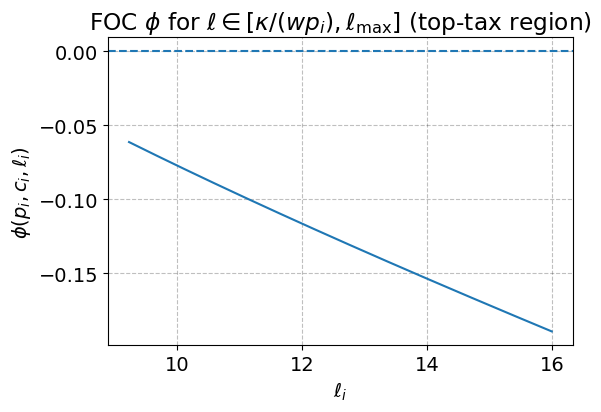

In [110]:
# 3: We can do the same, for the other FOC and its grid

ells_high = np.linspace(ell_k, par.ell_max, 200)

phi_high = []
for ell in ells_high:
    c = y_top(p_i, ell)
    phi_val = ((1 - par.tau - par.omega) * par.w * p_i) / c - par.nu * (ell**par.epsilon)
    phi_high.append(phi_val)

phi_high = np.array(phi_high)

plt.figure(figsize=(6,4))
plt.plot(ells_high, phi_high)
plt.axhline(0, linestyle="--")
plt.xlabel(r"$\ell_i$")
plt.ylabel(r"$\phi(p_i, c_i, \ell_i)$")
plt.title(r"FOC $\phi$ for $\ell \in [\kappa/(w p_i), \ell_{\max}]$ (top-tax region)")
plt.grid(True)
plt.show()

In [ ]:
# 4: We want to find the optimal l(p_i) using a numerical optimizer

def optimal_l_star(p):
    par = gov.par

    # We minimize
    def objective(ell):
        c = y_top(p, ell)
        if c <= 0:
            return 1e6
        return -gov.utility(c, ell)

    # search over ell in 0 to ell_max
    res = minimize_scalar(objective, bounds=(0, par.ell_max), method='bounded')

    ell_star = res.x
    U_star = -res.fun

    return ell_star, U_star

In [112]:
# We then compute the optimum value of l(p_i) and the utility

ell_star, U_star = optimal_l_star(p_i)

print("Optimal ell* =", ell_star)
print("Utility U*   =", U_star)

Optimal ell* = 7.824052917088267
Utility U*   = 1.5033476061293474


In [ ]:
from types import SimpleNamespace
from scipy.optimize import root_scalar
# 5: We want to follow the 4-step procedure and find the different optimal choices

# We first create a new class in the worker document, which is the c_i = y_i function

# Then we can add the 4-step procudere in the worker class aswell and then find the different optimal choices

opt_foc = gov.optimal_choice_top_FOC(p_i)

ells_star = np.empty(gov.par.N)
for i, p in enumerate(gov.sol.p):
    ells_star[i] = gov.optimal_choice_top_FOC(p).ell


In [114]:
# We can then print the results

print("ℓ*(p_i) =", opt.ell)
print("c*(p_i) =", opt.c)
print("U*(p_i) =", opt.U)

ℓ*(p_i) = 7.824053434358854
c*(p_i) = 7.116857013006423
U*(p_i) = 1.5033476061293514


In [115]:
# 6: We see that the first results is equivalent to the one from the numerical optimizer.
# Both methods seems to be equally fast



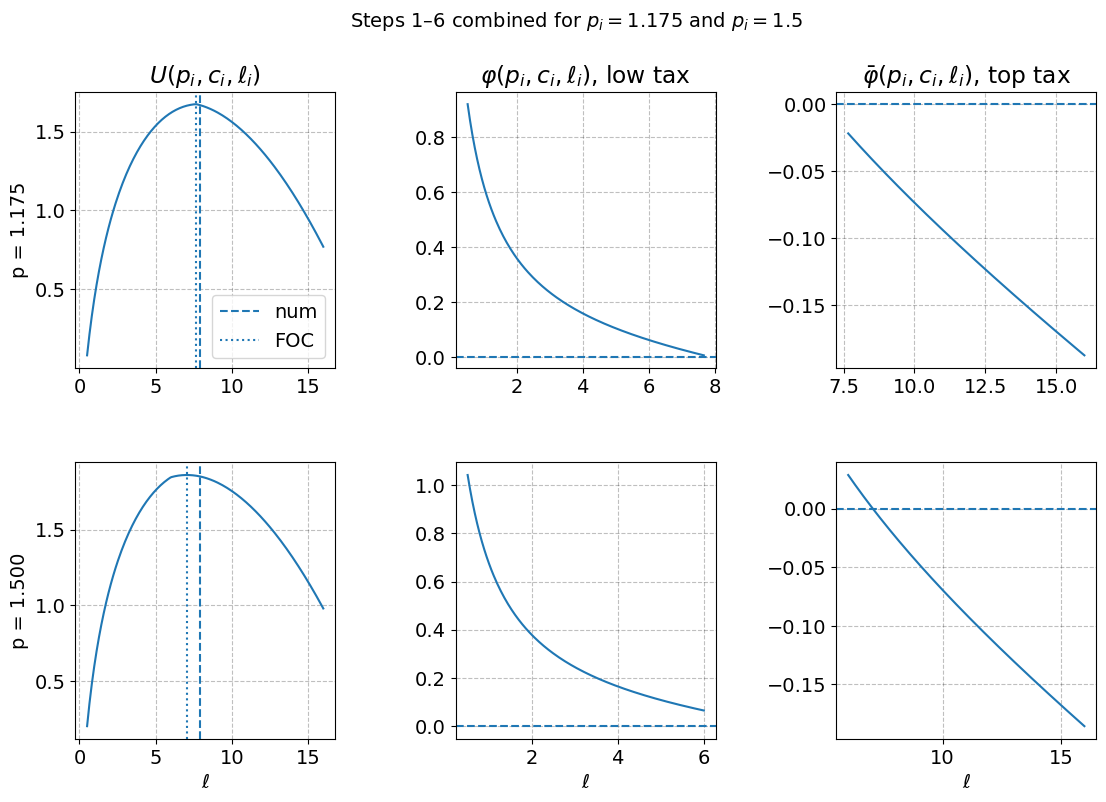

In [ ]:
# 7: Lastly we want to combine everything into one figure, to then do it again with new parameter values

# We can here use most of the previous code with the new parameter values:
p_list = [1.175, 1.5]

fig, axes = plt.subplots(len(p_list), 3, figsize=(12, 4*len(p_list)))
fig.tight_layout(pad=3.0)

for r, p in enumerate(p_list):

    ell_k = par.kappa / (par.w * p)     # kink point ℓ^k

    # optimal ℓ* from the two methods
    opt_num = gov.optimal_choice_numerical(p)
    opt_foc = gov.optimal_choice_top_FOC(p)

    # Utility in the given interval
    ells = np.linspace(0.5, par.ell_max, 200)
    cons = np.array([y_top(p, ell) for ell in ells])
    U    = gov.utility(cons, ells)

    ax = axes[r, 0]
    ax.plot(ells, U)
    ax.axvline(opt_num.ell, linestyle="--", label="num" if r == 0 else None)
    ax.axvline(opt_foc.ell, linestyle=":",  label="FOC" if r == 0 else None)
    ax.set_ylabel(f"p = {p:.3f}")
    ax.grid(True)
    if r == len(p_list)-1:
        ax.set_xlabel(r"$\ell$")
    if r == 0:
        ax.set_title(r"$U(p_i,c_i,\ell_i)$")
        ax.legend()

    # First FOC
    ell_low_max = min(ell_k, par.ell_max)
    ax = axes[r, 1]
    if ell_low_max > 0.5:
        ells_low = np.linspace(0.5, ell_low_max, 200)
        phi_low = []
        for ell in ells_low:
            c = y_top(p, ell)
            phi = ((1 - par.tau) * par.w * p) / c - par.nu * (ell**par.epsilon)
            phi_low.append(phi)
        ax.plot(ells_low, phi_low)
        ax.axhline(0, linestyle="--")
        ax.grid(True)
    if r == len(p_list)-1:
        ax.set_xlabel(r"$\ell$")
    if r == 0:
        ax.set_title(r"$\varphi(p_i,c_i,\ell_i)$, low tax")

    # Second FOC
    ell_high_min = max(ell_k, 0.5)
    ax = axes[r, 2]
    if ell_high_min < par.ell_max:
        ells_high = np.linspace(ell_high_min, par.ell_max, 200)
        phi_high = []
        for ell in ells_high:
            c = y_top(p, ell)
            phi = ((1 - par.tau - par.omega) * par.w * p) / c - par.nu * (ell**par.epsilon)
            phi_high.append(phi)
        ax.plot(ells_high, phi_high)
        ax.axhline(0, linestyle="--")
        ax.grid(True)
    if r == len(p_list)-1:
        ax.set_xlabel(r"$\ell$")
    if r == 0:
        ax.set_title(r"$\bar\varphi(p_i,c_i,\ell_i)$, top tax")

plt.suptitle("Steps 1–6 combined for $p_i = 1.175$ and $p_i = 1.5$", y=1.02, fontsize=14)
plt.show()

In [117]:
# Thereby the 3 previous plots are plotted again, with new p_i values.
# These new plot also share the approx same shapes as previously as expected.

### 3.2 Labor supply function

In [118]:
# 1: We want to plot l(pi) and c_i in the given interval

# We define the grid 
p_grid = np.linspace(0.5, 3.0, 100)

ell_star = np.empty_like(p_grid)
c_star   = np.empty_like(p_grid)

# We compute the values 
for i, p in enumerate(p_grid):
    opt = gov.optimal_choice_top_FOC(p)
    ell_star[i] = opt.ell
    c_star[i]   = opt.c                   


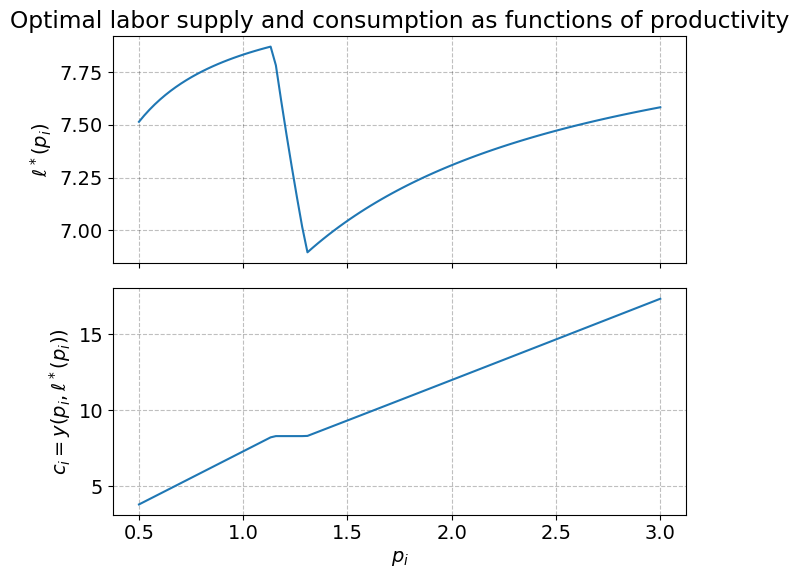

In [119]:
# Then we plot them

fig, ax = plt.subplots(2, 1, figsize=(7, 6), sharex=True)

# labor supply function
ax[0].plot(p_grid, ell_star)
ax[0].set_ylabel(r"$\ell^*(p_i)$")
ax[0].set_title("Optimal labor supply and consumption as functions of productivity")
ax[0].grid(True)

# implied consumption
ax[1].plot(p_grid, c_star)
ax[1].set_xlabel(r"$p_i$")
ax[1].set_ylabel(r"$c_i = y(p_i,\ell^*(p_i))$")
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 2: We want to know how the workers spread out in the 4-step solution



### 3.3 Public good

In [ ]:
# 1: We want to find out how the value of the swf changes when introducing the top tax
# The pre top tax swf has already been computed so we just compute the new swf

# New values
gov.par.omega = 0.2
gov.par.kappa = 9.0

# Solve workers with top tax
ells = np.empty(gov.par.N)
utils = np.empty(gov.par.N)
for i, p in enumerate(gov.sol.p):
    opt = gov.optimal_choice_top_FOC(p)
    ells[i]  = opt.ell
    utils[i] = opt.U

gov.sol.ell = ells
gov.sol.u   = utils

SWF_top = gov.SWF()

dSWF = SWF_top - SWF_no_top
print("SWF without top tax:", SWF_no_top)
print("SWF with top tax   :", SWF_top)
print("ΔSWF (top - no top):", dSWF)

SWF without top tax: 224.46089613901276
SWF with top tax   : 223.17930714217312
ΔSWF (top - no top): -1.2815889968396448


In [ ]:
# We can see that a welfare loss of 1.2815 occurs.

In [125]:
# 2: We want to see how the top tax affect the lorenz curve

# First we compute the lorenz curve without the tax
def lorenz_curve(c):
    c_sorted = np.sort(c)
    n = len(c_sorted)
    pop_share = np.arange(1, n+1)/n
    cons_share = np.cumsum(c_sorted)/np.sum(c_sorted)
    return pop_share, cons_share


gov.solve_workers()
c_no_top = gov.sol.c
pop_no, lorenz_no = lorenz_curve(c_no_top)


In [126]:
# Then with the top tax
gov.par.omega = 0.2
gov.par.kappa = 9.0

c_top = np.empty(gov.par.N)
for i, p in enumerate(gov.sol.p):
    opt = gov.optimal_choice_top_FOC(p)
    c_top[i] = opt.c

pop_top, lorenz_top = lorenz_curve(c_top)

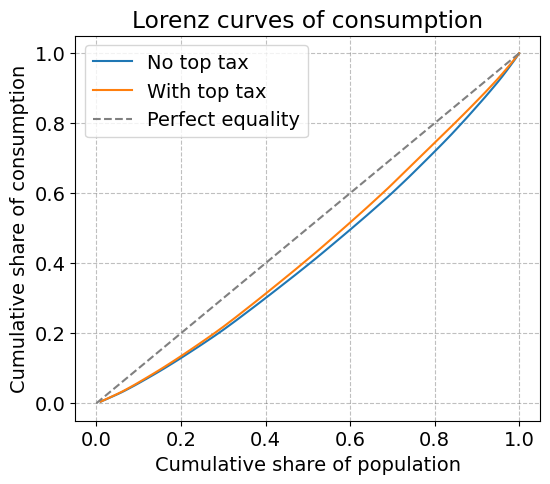

In [ ]:
# Then we plot the figures

plt.figure(figsize=(6,5))
plt.plot(pop_no,  lorenz_no,  label="No top tax")
plt.plot(pop_top, lorenz_top, label="With top tax")
plt.plot([0,1],[0,1], linestyle="--", color="gray", label="Perfect equality")

plt.xlabel("Cumulative share of population")
plt.ylabel("Cumulative share of consumption")
plt.title("Lorenz curves of consumption")
plt.legend()
plt.grid(True)
plt.show()

# We here see, that the difference is marginal but that the top tax reduces inequality

In [ ]:
# 3: For this exercise we want to search for parameter values of (ω) and (κ) that would yield an improvement to the SWF

# First we reset the parameters to no top tax
gov.solve_workers()
SWF_baseline = gov.SWF()
print("Baseline SWF (no top tax):", SWF_baseline)

Baseline SWF (no top tax): 224.46089613901276


In [ ]:
# We can here reuse previous code, where we solve for workers with top tax and return the swf

def SWF_with_top_tax(omega, kappa):
    par = gov.par
    par.omega = omega
    par.kappa = kappa

    # solve all workers with top-tax decision rule
    ells = np.empty(par.N)
    utils = np.empty(par.N)

    for i, p in enumerate(gov.sol.p):
        opt = gov.optimal_choice_top_FOC(p)
        ells[i]  = opt.ell
        utils[i] = opt.U

    gov.sol.ell = ells
    gov.sol.u   = utils

    return gov.SWF() 

In [ ]:
# We then search the grid for the optimal values and print results

omegas = np.linspace(0.0, 0.4, 9)
kappas = np.linspace(5.0, 15.0, 11)

best_SWF   = SWF_baseline
best_omega = 0.0
best_kappa = 1e9

for omega in omegas:
    for kappa in kappas:
        SWF_val = SWF_with_top_tax(omega, kappa)
        if SWF_val > best_SWF:
            best_SWF   = SWF_val
            best_omega = omega
            best_kappa = kappa

print("Best SWF found       :", best_SWF)
print("Baseline SWF         :", SWF_baseline)
print("Improvement ΔSWF     :", best_SWF - SWF_baseline)
print("Best (omega, kappa)  :", best_omega, best_kappa)


Best SWF found       : 224.46089613901276
Baseline SWF         : 224.46089613901276
Improvement ΔSWF     : 0.0
Best (omega, kappa)  : 0.0 1000000000.0


In [ ]:
# The result shown that we found no parameters that would be an improvement to the baseline SWF.

## 4 Extension

In [166]:
# 1: For the extension we want to expand upon the above model

# The utility function can be modified so that instead of everyone having the same value of v = 0.15 we now have a high and a low value meaning.
# This means that nu_L = 0.01 for low value workers and nu_H = 0.03 for high value workers.

par = gov.par
N = par.N
nu_L, nu_H = 0.01, 0.03

# New function
gov.sol.nu_i = np.array([nu_L]* (N//2) + [nu_H]* (N - N//2))

# We can the solve for new SWF and Tax revenue for example.
gov.solve_workers()

T   = gov.tax_revenue()
SWF = gov.SWF()

print("Tax revenue ( ν):", T)
print("SWF ( ν):        ", SWF)


Tax revenue ( ν): 50.224143480105106
SWF ( ν):         217.53009290338218


In [ ]:
# Here we see that the tax revenue is significantly lower than before and that the SWF is slightly higher.
# This is likely do to the fact that some workers now prefer leisure more than before.